# Постобработка

In [1]:
import pandas as pd

dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)

dinis_df.insert(10, 'Лишнее', False)
olya_df.insert(10, 'Лишнее', False)

<ipython-input-1-51a195d716cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
<ipython-input-1-51a195d716cc>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
<ipython-input-1-51a195d716cc>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)


In [2]:
dinis_df.drop(1, inplace=True)
olya_df.drop([0, 1], inplace=True)

In [3]:
merged_df = pd.concat([my_df, dinis_df, olya_df], axis = 0, ignore_index=True)

In [4]:
merged_df.shape

(2386, 15)

In [5]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep='/t')

merged_df.fillna(False, inplace=True)

drop_columns = ['annotation_id','annotator','created_at','lead_time','updated_at']
merged_df = merged_df.drop(columns=drop_columns)

def sentiment_proceed(index, df):
  import json

  row = df['sentiment'].values[index]
  try:
    sen_dict =  json.loads(row)
    choices = sen_dict['choices']
  except json.JSONDecodeError:
    choices = [row]
  return choices

for index, row in merged_df.iterrows():
  value_to_fill = sentiment_proceed(index, merged_df)
  for value in value_to_fill:
    merged_df.loc[index, value] = True

<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna(False, inplace=True)
<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.fillna(False, inplace=True)


In [6]:
merged_df.head()

,comment,id,rating,sentiment,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,спасибо,2945792,5,Понравилось выполнение заявки,False,False,False,False,False,True
1,спасибо!,3234340,5,Понравилось выполнение заявки,False,False,False,False,False,True
2,Отлично,3380332,5,Понравилось выполнение заявки,False,False,False,False,False,True
3,Благодарю за оперативное решение проблемы !,3381812,5,"{""choices"":[""Нравится скорость отработки заяво...",True,False,False,False,True,False
4,Прекрасный специалист! Побольше таких,3461991,5,Нравится качество работы сотрудников,False,False,False,True,False,False


In [7]:
merged_df = merged_df.drop(columns='sentiment')

In [8]:
int_categories = (merged_df.iloc[0::, 3::]).astype(int)
merged_df = pd.concat([merged_df.iloc[0::, 0:3], int_categories], axis=1)


In [9]:
merged_df.drop_duplicates(subset=['comment'], inplace=True, ignore_index=True, keep='last')

In [10]:
merged_df.shape

(1815, 9)

In [11]:
merged_df.to_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')

# Баланс классов

In [12]:
model_df = pd.read_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')
model_df.head()

,Unnamed: 0,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,0,Благодарю за оперативное решение проблемы !,3381812,5,1,0,0,0,1,0
1,1,спасибо управляющей компании за то что присла...,3627490,5,0,0,0,1,1,0
2,2,Решили мой вопрос. Спасибо!,3695420,5,1,0,0,0,0,1
3,3,Все исправили,3726842,5,1,0,0,0,0,0
4,4,спасибо большое! теперь не скрипят,3751364,5,0,0,1,0,0,1


In [13]:
model_df = model_df.drop(columns='Unnamed: 0')

In [14]:
marks_column = model_df.iloc[0::, 3::].columns

class_balance = pd.DataFrame({
    'marks' : [column for column in model_df.iloc[0::, 3::].columns],
    'count' : [((model_df[column] == 1).sum()) for column in model_df.iloc[0::, 3::].columns]
})

In [15]:
class_balance

,marks,count
0,Вопрос решен,755
1,Лишнее,265
2,Нравится качество выполнения заявки,210
3,Нравится качество работы сотрудников,360
4,Нравится скорость отработки заявок,704
5,Понравилось выполнение заявки,477


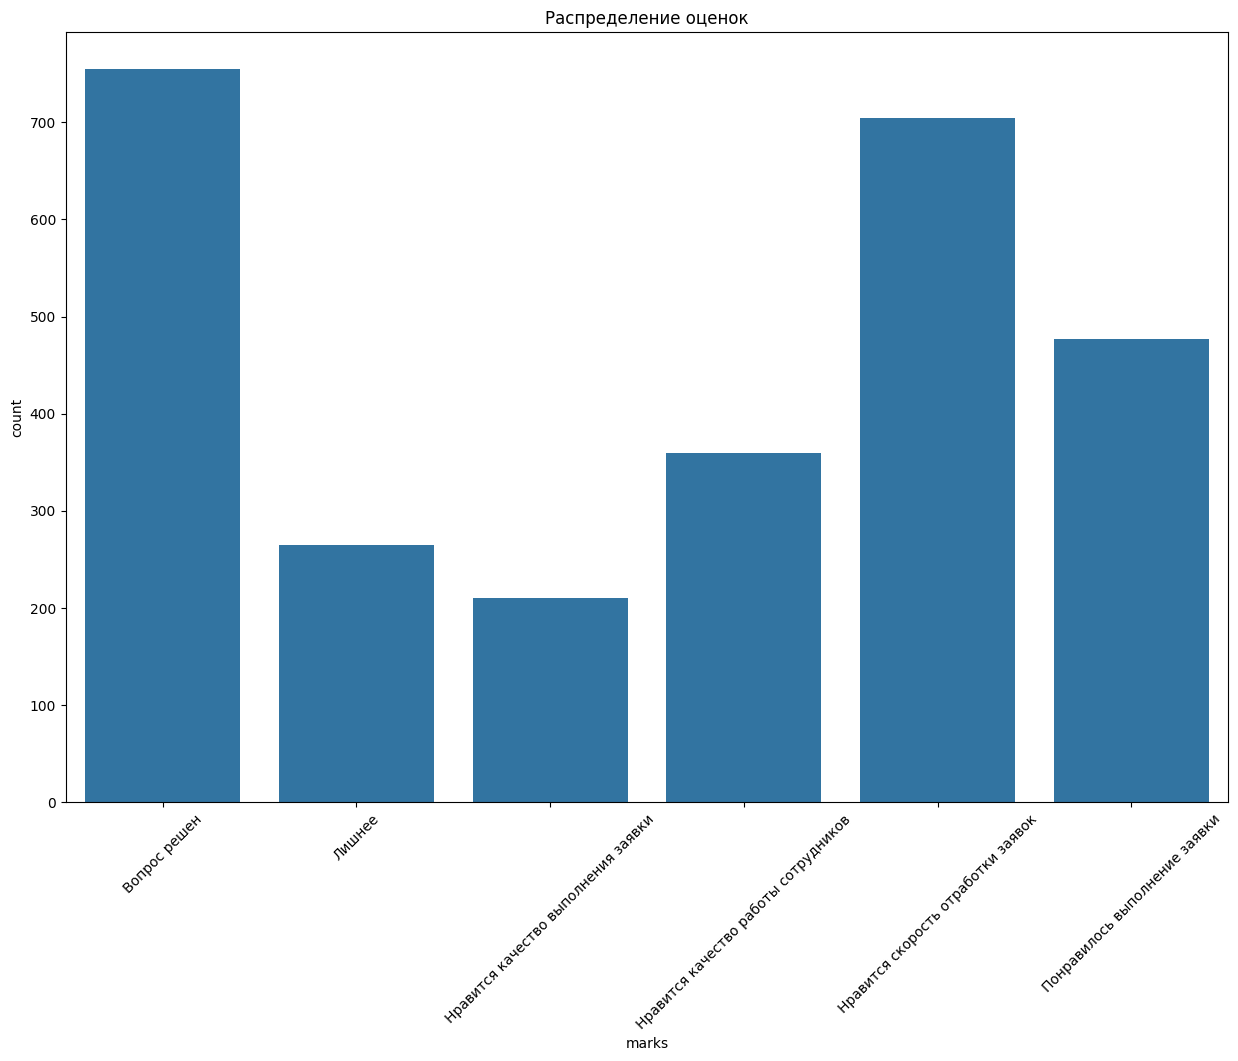

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(x='marks', y='count', data=class_balance, width=0.8)
plt.title('Распределение оценок')
plt.xticks(rotation=45)
plt.show()

# Статистика

**1. Облако слов**


Облако слов по всем комментариям.

по каждой категории отдельно

https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners

In [17]:
!pip install wordcloud

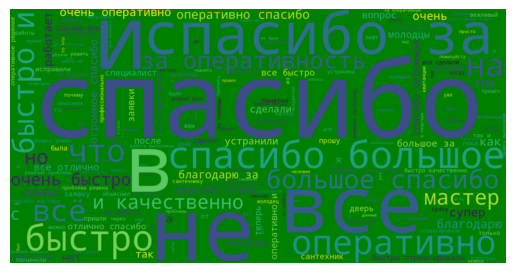

In [18]:
from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(comment for comment in model_df.comment)
simple_word_cloud = WordCloud(background_color='green', width=2048, height=1048).generate(text)

simple_word_cloud.to_file('/cloud.png')

plt.imshow(simple_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

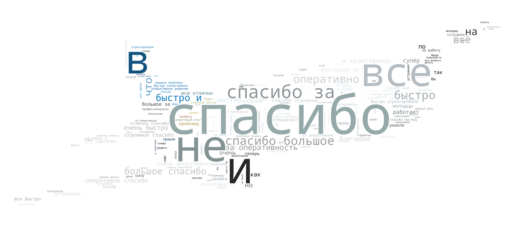

In [19]:
from PIL import Image
import numpy as np

plain = np.array(Image.open('/content/drive/MyDrive/nlp/самолет.png'))

plain_world_cloud = WordCloud(mask = plain, background_color='white',
                              width=2048, height=1048).generate(text)

background_plain = ImageColorGenerator(plain)
plain_world_cloud.recolor(color_func=background_plain)
plain_world_cloud.to_file('/content/drive/MyDrive/nlp/самолетик.png')

plt.imshow(plain_world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**2. Корреляция между категориями**

 например, часто ли встречаются вместе «Вопрос решен» и «Нравится скорость отработки заявок».

**3. Длина комментариев**


Среднюю и медианную длину комментариев (в словах или символах).

Построить гистограмму распределения длины.

Опционально: сравнить длину по категориям.

**4. Среднее количество категорий на комментарий**

Посчитать, сколько меток (True) ставится на один комментарий в среднем.

Построить гистограмму распределения меток по комментам.

# Модель и настройка весов

In [20]:
# https://habr.com/ru/articles/704592/


In [21]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [22]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset, DatasetDict
import pandas as pd
import evaluate
import numpy as np
from sklearn.model_selection import train_test_split
import torch


In [23]:
# dataset_pandas = model_df

# labels = model_df.columns[3:].to_list()

# train, test = train_test_split(dataset_pandas, test_size=0.2, random_state=42)

# train_data = Dataset.from_pandas(train)
# test_data = Dataset.from_pandas(test)

# dataset = DatasetDict({
#     'train': train_data,
#     'test': test_data
#     }
# )

# tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-multilingual-uncased')

# tokenized = tokenizer(dataset['train']['comment'][0:1], padding='max_length', truncation=True)

отсортировать датасет на 3 части с сбалансированными классами

In [24]:
# dataset_pandas = model_df

# labels = model_df.columns[3:].to_list()

# train, test = train_test_split(dataset_pandas, test_size=0.2, random_state=42)

# train_data = Dataset.from_pandas(train)
# test_data = Dataset.from_pandas(test)

# dataset = DatasetDict({
#     'train': train_data,
#     'test': test_data
#     }
# )

In [25]:
# ex.features.items()

In [26]:
# ex = dataset['train']
# type(ex.features)

# el = list(ex.features.items())[3:-1]
# el[0][0]

In [27]:

dataset_pandas = model_df



train, test = train_test_split(dataset_pandas, test_size=0.2, random_state=42)

train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)

dataset = DatasetDict({
    'train': train_data,
    'test': test_data
    }
)

label_columns = list(dataset["train"].features.keys())[3:-1]

tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-multilingual-uncased')

model = AutoModelForSequenceClassification.from_pretrained('google-bert/bert-base-multilingual-uncased',
                                                           num_labels=len(label_columns),
                                                           problem_type="multi_label_classification")

def tokenize(examples):
    tokenized = tokenizer(
        examples['comment'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='np'  # Явно указываем возврат numpy массивов
    )

    # Подготовка меток
    labels = np.zeros((len(examples['comment']), len(label_columns)), dtype=np.float32)
    for i, col in enumerate(label_columns):
        labels[:, i] = np.array(examples[col], dtype=np.float32)

    tokenized['labels'] = labels
    return tokenized

mapped_dataset = dataset.map(tokenize, batched=True)

metric = evaluate.load('roc_auc', 'multilabel')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1452 [00:00<?, ? examples/s]

Map:   0%|          | 0/363 [00:00<?, ? examples/s]

In [29]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
from sklearn.metrics import roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Приводим labels к float32 для согласованности
    labels = labels.astype(np.float32)  # Важно!

    probabilities = 1 / (1 + np.exp(-logits))
    return {
        "roc_auc": roc_auc_score(labels, probabilities, average='macro')
    }


training_args = TrainingArguments(
        output_dir='/content/drive/MyDrive/nlp/',
        eval_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=4,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='roc_auc',
        report_to="none"



)

data_colator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=mapped_dataset['train'],
    eval_dataset = mapped_dataset['test'],
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    data_collator=data_colator

)

trainer.train()

Epoch,Training Loss,Validation Loss,Roc Auc
1,No log,0.326146,0.874527
2,0.406400,0.303045,0.889809
3,0.282600,0.301593,0.892222
4,0.282600,0.302078,0.892111


TrainOutput(global_step=1452, training_loss=0.3097809615542409, metrics={'train_runtime': 714.0186, 'train_samples_per_second': 8.134, 'train_steps_per_second': 2.034, 'total_flos': 1528203892064256.0, 'train_loss': 0.3097809615542409, 'epoch': 4.0})

In [30]:
import matplotlib.pyplot as plt

history = trainer.state.log_history

# Достаем loss и метрики
train_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
roc_auc = [x['eval_roc_auc'] for x in history if 'eval_roc_auc' in x]

# График Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График ROC-AUC
plt.subplot(1, 2, 2)
plt.plot(roc_auc, label='ROC-AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.legend()

plt.show()

NameError: name 'trainer' is not defined

# Предсказание

In [31]:
comment_section = pd.DataFrame({
                    'comment' : ['Самолет гавно! Верните деньги', 'Спасибо! Кран починили, правда сотрудники немного нахамили', 'Евгений! Огромное Вам спасибо! Отремонтировали всрок, аккуратно', 'Я не знаю как долго это продержиться, но вроде починили. Главное что быстро'],
                    'rating' : [1, 4, 5, 5]
                   })

comment_section

,comment,rating
0,Самолет гавно! Верните деньги,1
1,"Спасибо! Кран починили, правда сотрудники немн...",4
2,Евгений! Огромное Вам спасибо! Отремонтировали...,5
3,"Я не знаю как долго это продержиться, но вроде...",5


In [ ]:
model.

MLkNN

In [ ]:
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

In [ ]:
model_df.columns[3:]

Index(['Вопрос решен', 'Лишнее', 'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников',
       'Нравится скорость отработки заявок', 'Понравилось выполнение заявки'],
      dtype='object')

In [ ]:
model_df

In [ ]:
X = model_df['comment']
y = np.asarray(model_df[model_df.columns[3:]])

vetorizar = TfidfVectorizer(max_features=2000, max_df=0.85)

vetorizar.fit(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)


In [ ]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7840 stored elements and shape (1661, 2000)>

In [ ]:


mlknn_classifier = MLkNN(k=3)
mlknn_classifier.fit(np.array(X_train_tfidf), y_train)

new_sentences = ["самолет хорошая компания"]
new_sentence_tfidf = vetorizar.transform(new_sentences)

predicted_sentences = mlknn_classifier.predict(new_sentence_tfidf)
print(predicted_sentences.toarray())


TypeError: NearestNeighbors.__init__() takes 1 positional argument but 2 were given

In [ ]:
predicted = mlknn_classifier.predict(X_test_tfidf)

print(accuracy_score(y_test, predicted))
print(hamming_loss(y_test, predicted))